## Lab 3 Report

Obaid Sidiqi, Maddie Sloan, Jasmine Soh

In [67]:
# import cell.
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile as wave
import simpleaudio as sa

## Summary

We learned how to implement a signal in the computer, and finding the response of the LTI system to different signals by implementing convolution.  First, we defined functions for the unit step function and the impulse function, which we used as a system impulse response to convolute with another defined function. Then we applied this knowledge to another audio signal problem to recover the original audio by performed convolution on each part to restore it to the original clip.
For each assignment, we also graphed the input signals and output convolutions result to visualize how the system transforms the signals.

## Assignment 1 --  Convolving Signals 

<IPython.core.display.Javascript object>


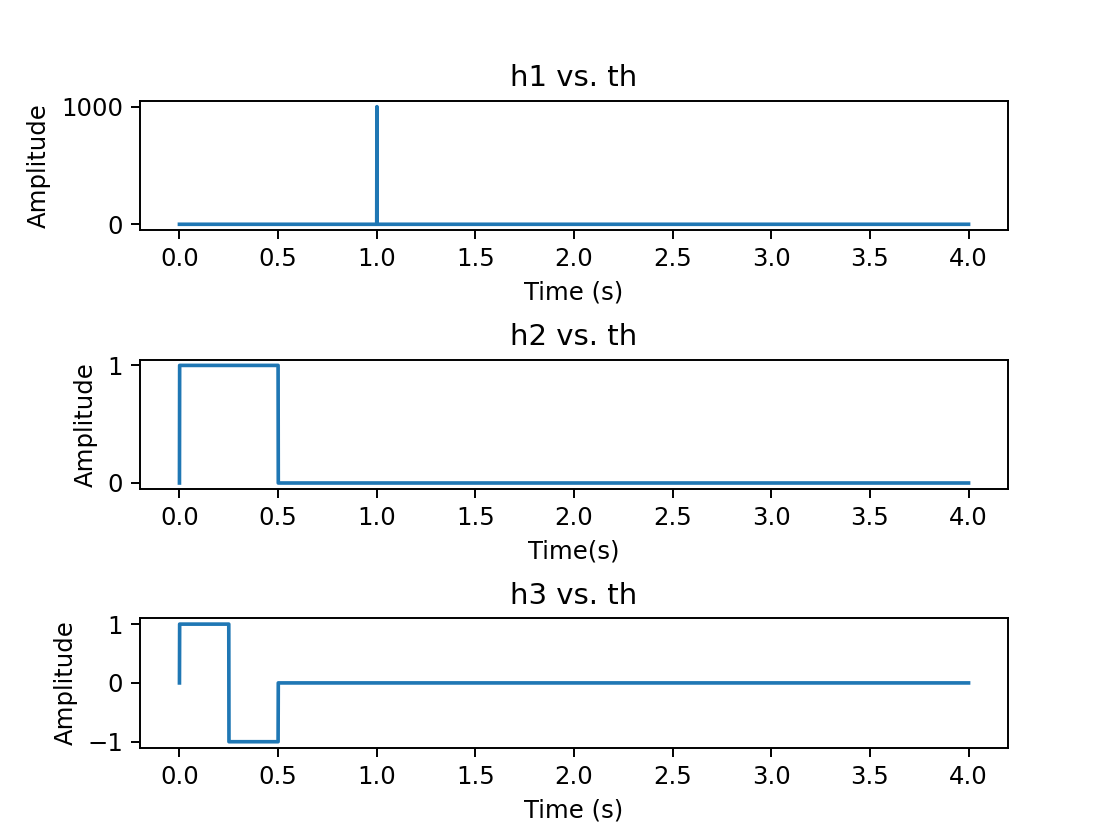

Text(0, 0.5, 'Amplitude')

In [68]:
# Assignment 1 - Convolving Signals 

# TODO: Defined impulse function and delta function.
# t: time vector
# fs: sampling rate
fs = 1000
def u(t):
    return 1.0 * (t>0)

def delta(t, fs):
    return fs * np.concatenate([[0], np.diff(u(t))])

# Part A
# defined unit step function and impulse function by using the created funcion
# with the corresponding time vector
th = np.arange(0, (4*fs)+1/fs, 1) * (1/fs)
x = u(th-1)-u(th-3)
h1 = delta(th-1, fs)
h2 = u(th)-u(th-0.5)
h3 = u(th)-2*u(th-0.25)+u(th-0.5)

# Part B
# Ploting each function with the corresponding time frame by using the subplot function.
fig1 = plt.figure(1)
fig1.subplots_adjust(hspace = 1, wspace = 1)
plt.subplot(3, 1, 1)
plt.plot(th, h1)
plt.title("h1 vs. th")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 2)
plt.plot(th, h2)
plt.title("h2 vs. th")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 3)
plt.plot(th, h3)
plt.title("h3 vs. th")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")



<IPython.core.display.Javascript object>


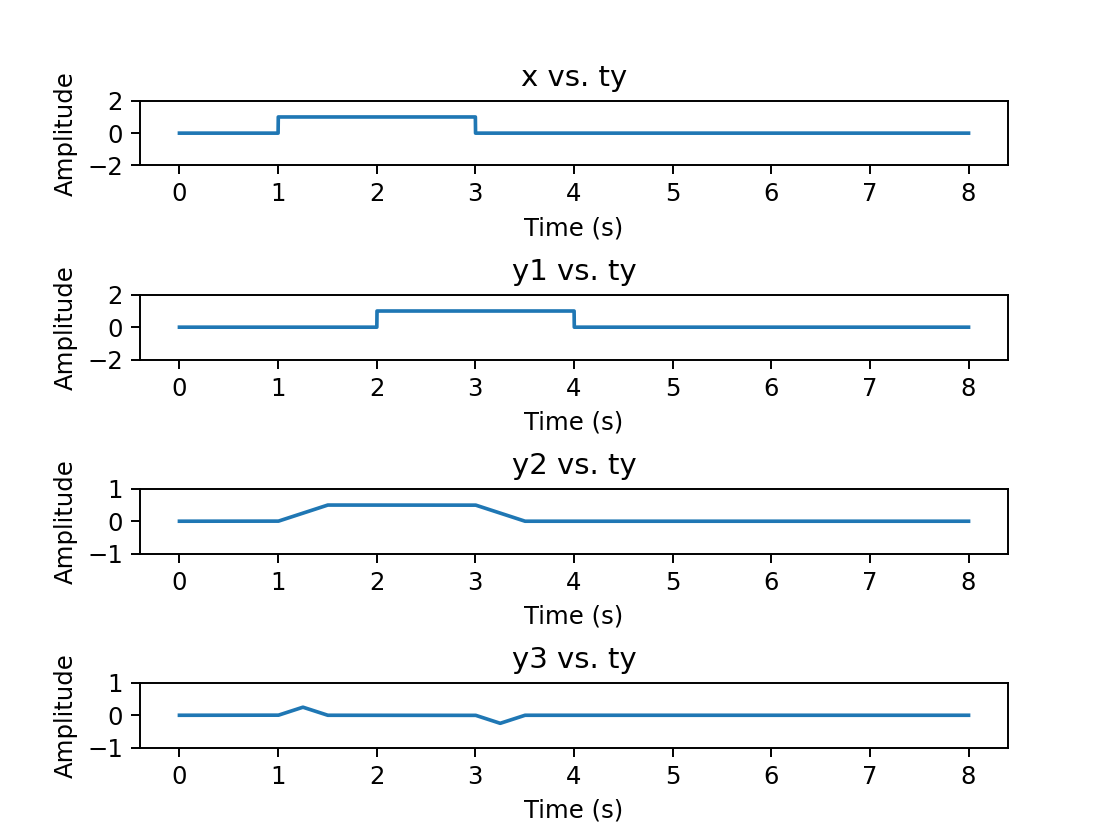

(-1.0, 1.0)

In [69]:
# Assignment 1: Convolving Signals 

# part C
# Definding different y by comvolving x with each h.
y1 = np.convolve(x, h1) * (1/fs)
y2 = np.convolve(x, h2) * (1/fs)
y3 = np.convolve(x, h3) * (1/fs)

# Part D
# Created a time vector (ty) from 0 to 8s, and ploted the x vs ty and the covolution result vs ty.
x1 = np.concatenate([x, np.zeros(len(x)-1)])
ty = np.arange(0, (8 * fs+1), 1) * (1/fs)

fig2 = plt.figure(2)
fig2.subplots_adjust(hspace = 2, wspace = 2)
plt.subplot(4, 1, 1)
plt.plot(ty, x1)
plt.title("x vs. ty")
plt.xlabel("Time (s)")
plt.ylim(-2, 2)
plt.ylabel("Amplitude")

plt.subplot(4, 1, 2)
plt.plot(ty, y1)
plt.title("y1 vs. ty")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.ylim(-2, 2)

plt.subplot(4, 1, 3)
plt.plot(ty, y2)
plt.title("y2 vs. ty")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.ylim(-1, 1)

plt.subplot(4, 1, 4)
plt.plot(ty, y3)
plt.title("y3 vs. ty")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.ylim(-1, 1)


###  Discussion

If we use smaller frequencies then there would be fewer time simples. As result, we can not get a good approximation for the impulse response and unite impulse response, so that would affect the result for the convolution as well. Also, the graph would appear to have lines with slope rather than vertical lines. The aspects that correspond to the largest values of y2 and y3 would be when the functions being convoluted have the most overlapping area.

## Assignment 2 --  Revisiting Time Delay Transformation

<IPython.core.display.Javascript object>


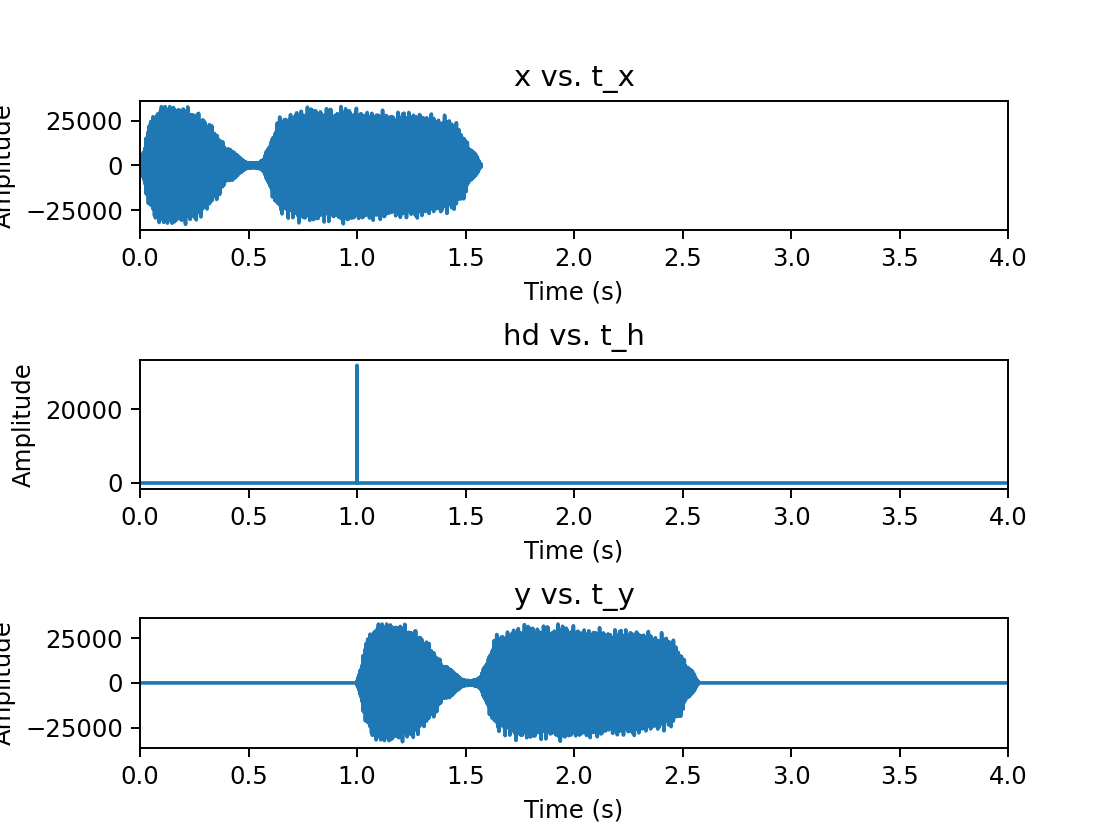

(0.0, 4.0)

In [70]:
# Assignment 2: Revisiting Time Delay Transformation

# Part A
# TODO: Reading the train audio file data.
fs_x, x = wave.read("train32.wav")
t_x = np.arange(0, len(x), 1)* (1/fs_x)


# Part B
# creating a an impulse response with one second delay time.
t_h = np.arange(0, (4*fs_x), 1) * (1/fs_x)
hd = delta(t_h-1, fs_x)


# Part C
# convoluting the audio vector x with the delay impulse response.
y = np.convolve(x, hd) * (1/fs_x)
t_y = np.arange(0, len(y), 1) * (1/fs_x)

# Part D
# Ploting the addio signal, delayed impusle, and the convolution result.
fig3 = plt.figure(3)
fig3.subplots_adjust(hspace = 1, wspace = 1)
plt.subplot(3,1,1)
plt.plot(t_x, x)
plt.title("x vs. t_x")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(0, 4)

plt.subplot(3,1,2)
plt.plot(t_h, hd)
plt.title("hd vs. t_h")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(0,4)

plt.subplot(3,1,3)
plt.plot(t_y, y)
plt.title("y vs. t_y")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(0,4)

###  Discussion
If we did not scale the signal, the output would be much larger in amplitude.
Using h(t) will not have any effect on the convolution, as result the graph of y(t) will look the same as x(t), and the sound will be the same as well.


## Assignment 3 -- Audio File Realignment

In [71]:
# Assignment 3 -- Audio File Realignment

# Part A
# TODO: Reading the three segment audio data.
fs_s2, x1 = wave.read("s2_1.wav")
fs_s2, x2 = wave.read("s2_2.wav")
fs_s2, x3 = wave.read("s2_3.wav")


# Part B
# TODO: Creating the impulse filter by using the delta function
t = np.arange(0, (3*fs_s2), 1) * (1/fs_s2)
h1 = delta(t-1, fs_s2)
h2 = 10 * delta(t, fs_s2)
h3 = delta(t-2, fs_s2)

# Part C
# TODO: convoluting the audio data with the impulse filters.
y1 = np.convolve(x1[:,0], h1) * (1/fs_s2)
y2 = np.convolve(x2[:,0], h2) * (1/fs_s2)
y3 = np.convolve(x3[:,0], h3) * (1/fs_s2)
z1 = np.concatenate([y1,np.zeros(len(y3)-len(y1))])
z2 = np.concatenate([y2,np.zeros(len(y3)-len(y2))])  

# Part D
# Adding three result from the covolution filter. Writing it to a wave file and playing the result.
y = (z1+z2+y3)             
play_obj = sa.play_buffer(y.astype("int16"), 1, 2, fs_s2)
play_obj.wait_done()
wave.write("OrignalS2.wav", fs_s2, y.astype("int16"))

### Discussion
If we put x2 in all three filters,the amplified x2 would play first with a louder sound, and the unamplified ones repeat afterward because they shifted to the right. It sounds like an echo with a louder version and goes to two lower versions.
